# deeplearningで柴犬の写真からうちの子かどうか判定(1)

**分析条件**　mydog:<font color="RoyalBlue">60枚</font> otherdogs:<font color="RoyalBlue">60枚</font> input_size:<font color="RoyalBlue">320*320</font> Data Augumentation:<font color="RoyalBlue">あり/なしの2通り</font>

### 1 Google Drive のマウント

In [0]:
# Google Driveマウント
from google.colab import drive
drive.mount('/content/drive')

### 2 Google Driveにアップロードした犬のjpgのzipファイルを解凍する



In [0]:
# cd '/content/drive/'My Drive/'Colab Notebooks'内の作業フォルダへ移動
%cd '/content/drive/'My Drive/Colab Notebooks/Self_Study/02_mydog_or_otherdogs/original_data
# mydog1データ
!unzip "mydog1.zip"

In [0]:
# otherdogs1データ
!unzip "otherdogs1.zip"

In [0]:
# ＜Colaboratory環境でのデータ数確認＞ original data 
# cd '/content/drive/'My Drive/'Colab Notebooks'内の作業フォルダへ移動
%cd '/content/drive/'My Drive/Colab Notebooks/Self_Study/02_mydog_or_otherdogs/
!ls ./original_data/mydog1 | wc -l
!ls ./original_data/otherdogs1 | wc -l

### 3 フォルダ作成とファイルパス設定

In [0]:
# 必要なライブラリの読み込み
import os, shutil

# original_dataフォルダのファイルパスの設定
original_dataset_dir = 'original_data'
# original_data内(定義名'original_dataset_dir')に次の2つのフォルダパスを設定する。
original_mydog_dir = 'original_data/mydog1'
original_otherdogs_dir = 'original_data/otherdogs1'

# use_dataのファイルパスの設定
base_dir = 'use_data'

In [0]:
# フォルダ構築及び、ファイルパス設定を行うコード

# use_dataフォルダ(定義名'base_dir')内に次の3つのフォルダパスを設定する。
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# trainフォルダ内に'mydog'フォルダと'otherdogs'フォルダのパスを設定する。
train_mydog_dir = os.path.join(train_dir, 'mydog')
os.mkdir(train_mydog_dir)
train_otherdogs_dir = os.path.join(train_dir, 'otherdogs')
os.mkdir(train_otherdogs_dir)

# validationフォルダ内に'mydog'フォルダと'otherdogs'フォルダのパスを設定する。
validation_mydog_dir = os.path.join(validation_dir, 'mydog')
os.mkdir(validation_mydog_dir)
validation_otherdogs_dir = os.path.join(validation_dir, 'otherdogs')
os.mkdir(validation_otherdogs_dir)

# testフォルダ内に'mydog'フォルダと'otherdogs'フォルダのパスを設定する。
test_mydog_dir = os.path.join(test_dir, 'mydog')
os.mkdir(test_mydog_dir)
test_otherdogs_dir = os.path.join(test_dir, 'otherdogs')
os.mkdir(test_otherdogs_dir)

### 4 データコピー

In [0]:
# train用にtrain_mydog_dirにmydogファイルを30個コピー
fnames = ['mydog{}.jpg'.format(i) for i in range(30)]
for fname in fnames:
    src = os.path.join(original_mydog_dir, fname)
    dst = os.path.join(train_mydog_dir, fname)
    shutil.copyfile(src, dst)

# validation用にvalidation_mydog_dirにmydogファイルを20個コピー
fnames = ['mydog{}.jpg'.format(i) for i in range(30,50)]
for fname in fnames:
    src = os.path.join(original_mydog_dir, fname)
    dst = os.path.join(validation_mydog_dir, fname)
    shutil.copyfile(src, dst)

# test用にtest_mydog_dirにmydogファイルを10個コピー
fnames = ['mydog{}.jpg'.format(i) for i in range(50,60)]
for fname in fnames:
    src = os.path.join(original_mydog_dir, fname)
    dst = os.path.join(test_mydog_dir, fname)
    shutil.copyfile(src, dst)

In [0]:
# train用にtrain_otherdogs_dirにotherdogsファイルを30個コピー
fnames = ['otherdogs{}.jpg'.format(i) for i in range(30)]
for fname in fnames:
    src = os.path.join(original_otherdogs_dir, fname)
    dst = os.path.join(train_otherdogs_dir, fname)
    shutil.copyfile(src, dst)

# validation用にvalidation_otherdogs_dirにotherdogsファイルを20個コピー
fnames = ['otherdogs{}.jpg'.format(i) for i in range(30, 50)]
for fname in fnames:
    src = os.path.join(original_otherdogs_dir, fname)
    dst = os.path.join(validation_otherdogs_dir, fname)
    shutil.copyfile(src, dst)

# test用にtest_otherdogs_dirにotherdogsファイルを10個コピー
fnames = ['otherdogs{}.jpg'.format(i) for i in range(50, 60)]
for fname in fnames:
    src = os.path.join(original_otherdogs_dir, fname)
    dst = os.path.join(test_otherdogs_dir, fname)
    shutil.copyfile(src, dst)

In [0]:
# cd '/content/drive/'My Drive/'Colab Notebooks'内の作業フォルダへ移動
%cd '/content/drive/'My Drive/Colab Notebooks/Self_Study/02_mydog_or_otherdogs

# 各フォルダに格納されているファイル数の確認
print('total training mydog images:', len(os.listdir(train_mydog_dir)))
print('total training otherdogs images:', len(os.listdir(train_otherdogs_dir)))
print('total validation mydog images:', len(os.listdir(validation_mydog_dir)))
print('total validation otherdogs images:', len(os.listdir(validation_otherdogs_dir)))
print('total test mydog images:', len(os.listdir(test_mydog_dir)))
print('total test otherdogs images:', len(os.listdir(test_otherdogs_dir)))

### 5 モデル構築

In [0]:
# モデルを構築する
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(320, 320, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

In [0]:
# コンパイル
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
# ImageDataGeneratorで画像をテンソルに変換する
from keras.preprocessing.image import ImageDataGenerator

# rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # Target Directory
        train_dir,
        # resize
        target_size=(320, 320),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(320, 320),
        batch_size=20,
        class_mode='binary')

In [0]:
# 学習
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

In [0]:
# 学習済みモデルの保存
model.save('mydog_or_otherdogs_01a2.h5')

### 6 結果

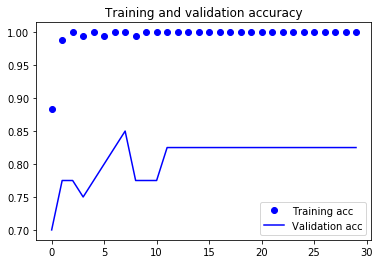

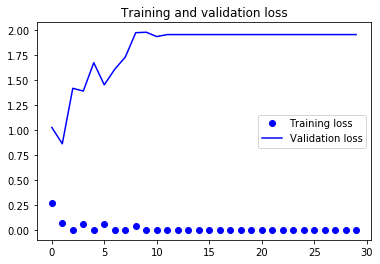

In [0]:
# 訓練結果グラフ
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
# テストデータでの検証結果
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(320,320),
    batch_size=50,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test loss:', test_loss)
print('test acc:', test_acc)

Found 20 images belonging to 2 classes.
test loss: 1.6523902654647826
test acc: 0.75


### 7 Data Augumentationありでの学習

In [0]:
# 画像データをテンソルに変換
# trainデータを水増しする
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# validation用とtest用は水増ししない
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # target directory
        train_dir,
        # size 320x320
        target_size=(320, 320),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(320, 320),
        batch_size=32,
        class_mode='binary')

# 学習
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

In [0]:
# 学習済みモデルの保存
model.save('mydog_or_otherdogs_01b2.h5')

### 8 結果

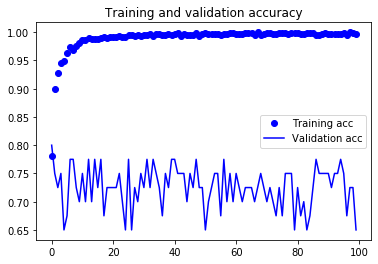

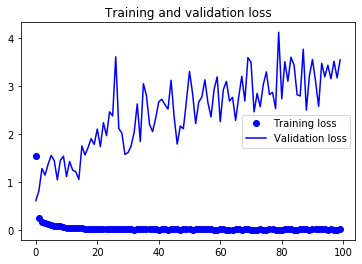

In [0]:
# 訓練結果グラフ
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
# テストデータでの検証結果
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(320,320),
    batch_size=50,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test loss:', test_loss)
print('test acc:', test_acc)

Found 20 images belonging to 2 classes.
test loss: 2.102495942115784
test acc: 0.75
